# CIFAR10 Dataset with Tensorflow ✈🐕🚗
Google Colab link: https://colab.research.google.com/drive/1yCbqzDXFxlcXOkyxn5F6o2z3RQLqvgv-#scrollTo=PMeC3If6Wmko


This notebook is my implementation for neural networks that could classify the 10 classes of CIFAR10 dataset with tensorflow.

Our 10 classes:
1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. horse
8. frog
9. ship
10. truck

Link of dataset: https://www.tensorflow.org/datasets/catalog/cifar10

In [1]:
# imports
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
import tensorflow_datasets as tfds
print(tf.__version__)

2.12.0


## Loading our data using tensorflow datasets and getting our data ready

In [2]:
# Loading our data from tensorflow datasets
ds , ds_info = tfds.load('cifar10',
                         split = ['train' , 'test'],
                         shuffle_files = True,
                         as_supervised = True,
                         with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteA67CGP/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteA67CGP/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [3]:
# Examining our metadata
ds_info

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path=PosixGPath('/tmp/tmpfb6hy_7gtfds'),
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning mul

In [4]:
# Getting our data ready
(train_data , test_data) = ds
class_names = ds_info.features['label'].names
train_data , test_data , class_names

(<_PrefetchDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'])

## Becoming one with the data

What we have found from the below code:
1. Data is not scaled
2. Images are of dtype `uint8`
  * needs to be casted to float32
3. Each class have 5000 training images

In [5]:
# Take one sample of the training data
train_one_sample = train_data.take(1) # (image_tensor , label)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [6]:
for image , label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image datatype: {image.dtype}
  Label: {class_names[label.numpy()]}
  Label datatype: {label.dtype}
  """
  )


  Image shape: (32, 32, 3)
  Image datatype: <dtype: 'uint8'>
  Label: horse
  Label datatype: <dtype: 'int64'>
  


In [7]:
# What does our image look like
image , image.shape

(<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
 array([[[143,  96,  70],
         [141,  96,  72],
         [135,  93,  72],
         ...,
         [ 96,  37,  19],
         [105,  42,  18],
         [104,  38,  20]],
 
        [[128,  98,  92],
         [146, 118, 112],
         [170, 145, 138],
         ...,
         [108,  45,  26],
         [112,  44,  24],
         [112,  41,  22]],
 
        [[ 93,  69,  75],
         [118,  96, 101],
         [179, 160, 162],
         ...,
         [128,  68,  47],
         [125,  61,  42],
         [122,  59,  39]],
 
        ...,
 
        [[187, 150, 123],
         [184, 148, 123],
         [179, 142, 121],
         ...,
         [198, 163, 132],
         [201, 166, 135],
         [207, 174, 143]],
 
        [[187, 150, 117],
         [181, 143, 115],
         [175, 136, 113],
         ...,
         [201, 164, 132],
         [205, 168, 135],
         [207, 171, 139]],
 
        [[195, 161, 126],
         [187, 153, 123],
         [186, 1

In [8]:
# What is the min and max values in the image
np.min(image) , np.max(image)

(0, 249)

It looks like our image isnot normalized

(-0.5, 31.5, 31.5, -0.5)

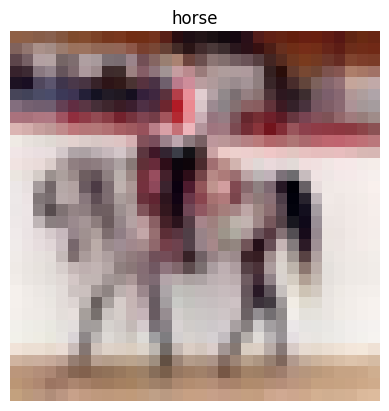

In [9]:
# Plot an image
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [10]:
# getting counts of each class
counts = {}
for _ , label in train_data:
  x = label.numpy()
  if(x in counts):
    counts[x] += 1
  else :
    counts[x] = 1
counts

{7: 5000,
 8: 5000,
 4: 5000,
 6: 5000,
 5: 5000,
 2: 5000,
 9: 5000,
 3: 5000,
 0: 5000,
 1: 5000}

So each class has the same number of training images

### Creating our preprocessing function to cast and rescale our image and one hot encode the label

In [11]:
# Our preprocessing functions
def preprocess_img(image , label , scale = True):
  image = tf.cast(image , tf.float32)
  label = tf.one_hot(label , depth = 10)
  if (scale):
    image = image/255.
  return image , label

In [12]:
# Checking our preprocessing function
preprocessed_img_no_scaling = preprocess_img(image , label , False)[0]
preprocessed_img_scaling = preprocess_img(image , label , True)[0]
tf.reduce_min(preprocessed_img_no_scaling) , tf.reduce_max(preprocessed_img_no_scaling) , tf.reduce_min(preprocessed_img_scaling) , tf.reduce_max(preprocessed_img_scaling)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=249.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.9764706>)

In [13]:
preprocess_img(image , label , False)[1].shape

TensorShape([10])

In [14]:
### Batching and creating our data input pipelines
train_data_pipe = train_data.map(map_func = preprocess_img , num_parallel_calls = tf.data.AUTOTUNE).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

test_data_pipe = test_data.map(map_func = preprocess_img , num_parallel_calls = tf.data.AUTOTUNE).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

train_data_pipe , test_data_pipe

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>)

## Creating our baseline model using Conventional Neural Networks

In [15]:
train_data_pipe

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [16]:
from tensorflow.keras.layers import Dense, Input , Flatten
from tensorflow.keras.models import Sequential

model_0 = Sequential([
    Input(shape=(32, 32, 3)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [ ]:
model_0.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_25 (Dense)            (None, 4096)              12587008  
                                                                 
 dense_26 (Dense)            (None, 1024)              4195328   
                                                                 
 dense_27 (Dense)            (None, 128)               131200    
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
Total params: 16,922,442
Trainable params: 16,922,442


In [ ]:
# Training
history_0 = model_0.fit(train_data_pipe,
                        epochs = 20,
                        steps_per_epoch = len(train_data_pipe),
                        validation_data = test_data_pipe,
                        validation_steps = int(0.15 * len(test_data_pipe)),
                        )

Epoch 1/20
1563/1563 [==============================] - 13s 7ms/step - loss: 1.9243 - accuracy: 0.2965 - val_loss: 1.7641 - val_accuracy: 0.3505
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7113 - accuracy: 0.3821 - val_loss: 1.6332 - val_accuracy: 0.3974
Epoch 3/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6149 - accuracy: 0.4181 - val_loss: 1.6533 - val_accuracy: 0.3933
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5596 - accuracy: 0.4399 - val_loss: 1.5940 - val_accuracy: 0.4212
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5146 - accuracy: 0.4557 - val_loss: 1.5853 - val_accuracy: 0.4205
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4776 - accuracy: 0.4699 - val_loss: 1.5439 - val_accuracy: 0.4232
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4439 - accuracy: 0.4819 - val_loss: 1.5403 - val_ac

#### Evaluation for our base model

In [27]:
# plot loss curves function
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure()
  plt.plot(epochs , loss , label = 'training_loss')
  plt.plot(epochs , val_loss , label = 'val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs , accuracy , label = 'training_accuracy')
  plt.plot(epochs , val_accuracy , label = 'val_accuracy')
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [ ]:
model_0.evaluate(test_data_pipe)

313/313 [==============================] - 2s 5ms/step - loss: 1.6205 - accuracy: 0.4698


[1.620511531829834, 0.4697999954223633]

our model accuracy is ~47% after 20 epochs

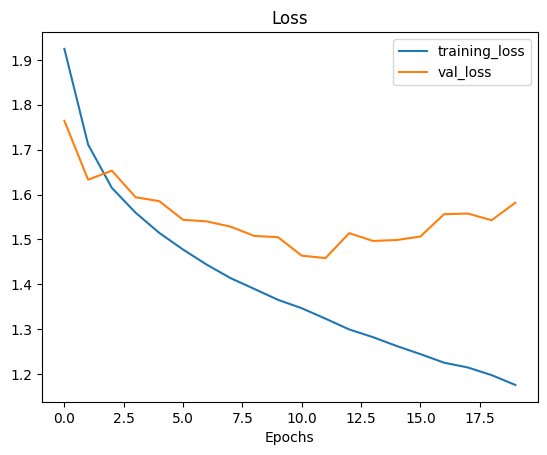

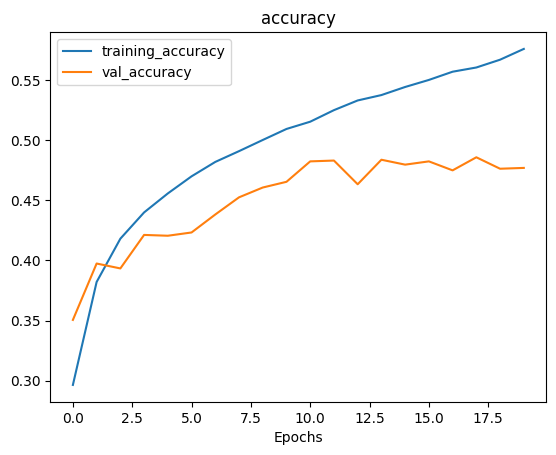

In [ ]:
plot_loss_curves(history_0)

It seems that at the model started to overfit

So things we can do:
1. Get more data
  * not possible as this is a static dataset
2. Larger architecture
3. Change architecture type
  * as this is a computer vision problem so it will be more ideal to use Convolutional neural networks , so let's try that next

In [ ]:
# Saving our model
import os
save_dir = "drive/MyDrive/ComputerVision/CIFAR10/Model_0_Conventional_Neural_Network"
os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model_0.save(save_dir)

In [ ]:
# reloding our model and testing
load_saved_model = tf.keras.models.load_model(save_dir)
load_saved_model.evaluate(test_data_pipe)

313/313 [==============================] - 1s 4ms/step - loss: 1.6205 - accuracy: 0.4698


[1.620511531829834, 0.4697999954223633]

Model was saved successfully

## Convolutional Neural Networks 🧠
now our baseline accuracy on the test data is ~47%.

In [110]:
# Before implementing our nns let's create some helper function to create a model checkpoint callback and a tensorboard callback
import datetime

def create_tensorboard_callback(dir_name , experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  return tensorboard_callback

def create_model_checkpoint(dir_name):
  checkpoint_path = dir_name + "/cp.cpkt"
  model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = "val_loss",
                                                      save_best_only=True,
                                                      save_weights_only = True,
                                                      verbose = 0)
  return model_checkpoint

### Tiny VGG Architecture
It is from the https://poloclub.github.io/cnn-explainer/

In [24]:
# Creating our Tiny VGG model
from tensorflow.keras.layers import  Conv2D , MaxPooling2D , Flatten , Dense

model_1 = tf.keras.models.Sequential([
    Conv2D(10 , 3 , activation = 'relu' , input_shape = (32,32,3)),
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPooling2D(2),
    Conv2D(10 , 3 , activation = 'relu'),
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(10 , activation = 'sigmoid')
])

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data_pipe,
                        epochs = 5,
                        steps_per_epoch = len(train_data_pipe),
                        validation_data = test_data_pipe,
                        validation_steps = len(test_data_pipe))

Epoch 1/5
1563/1563 [==============================] - 26s 8ms/step - loss: 0.2790 - accuracy: 0.3209 - val_loss: 0.2502 - val_accuracy: 0.4122
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2377 - accuracy: 0.4522 - val_loss: 0.2327 - val_accuracy: 0.4752
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2231 - accuracy: 0.4990 - val_loss: 0.2188 - val_accuracy: 0.5095
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2133 - accuracy: 0.5318 - val_loss: 0.2106 - val_accuracy: 0.5362
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2060 - accuracy: 0.5545 - val_loss: 0.2036 - val_accuracy: 0.5587


In [40]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 10)        280       
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 10)        910       
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                  

Using Tiny VGG, we have beaten the convontional neural network accuracy in just 5 epochs and with 5520 parameters compared to model_0's 16 million paramaters!

In [25]:
model_1.evaluate(test_data_pipe)

313/313 [==============================] - 1s 4ms/step - loss: 0.2036 - accuracy: 0.5587


[0.20363150537014008, 0.5587000250816345]

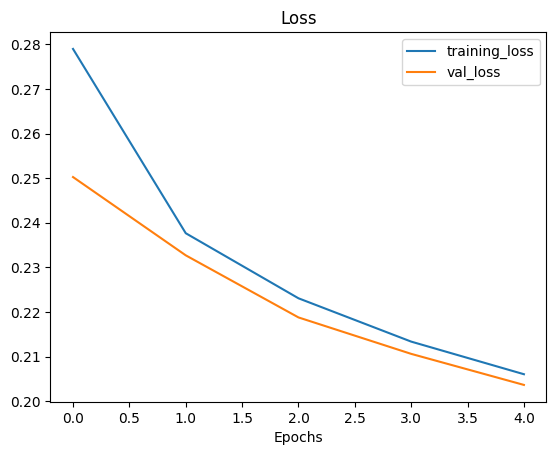

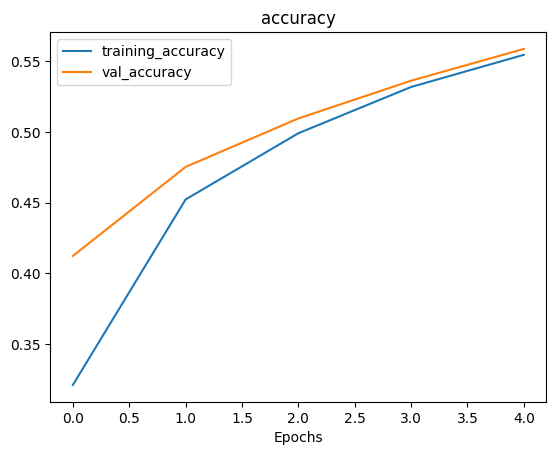

In [28]:
plot_loss_curves(history_1)

It looks like our model is on the right track , let's try fitting for an extra 15 epochs

In [29]:
# Training for an extra 15 epochs to compare with model 0
history_1_2 = model_1.fit(train_data_pipe,
                          epochs = 15,
                          steps_per_epoch = len(train_data_pipe),
                          validation_data = test_data_pipe,
                          validation_steps = len(test_data_pipe))

Epoch 1/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2010 - accuracy: 0.5698 - val_loss: 0.2004 - val_accuracy: 0.5681
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1972 - accuracy: 0.5802 - val_loss: 0.1977 - val_accuracy: 0.5755
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1941 - accuracy: 0.5886 - val_loss: 0.1959 - val_accuracy: 0.5827
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1915 - accuracy: 0.5955 - val_loss: 0.1934 - val_accuracy: 0.5898
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1892 - accuracy: 0.6013 - val_loss: 0.1919 - val_accuracy: 0.5937
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1868 - accuracy: 0.6071 - val_loss: 0.1900 - val_accuracy: 0.5991
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1847 - accuracy: 0.6133 - val_loss: 0.1884 - val_ac

In [32]:
# Evaluation our model after training for 20 epochs
model_1.evaluate(test_data_pipe)

313/313 [==============================] - 2s 7ms/step - loss: 0.1804 - accuracy: 0.6241


[0.18042129278182983, 0.6241000294685364]

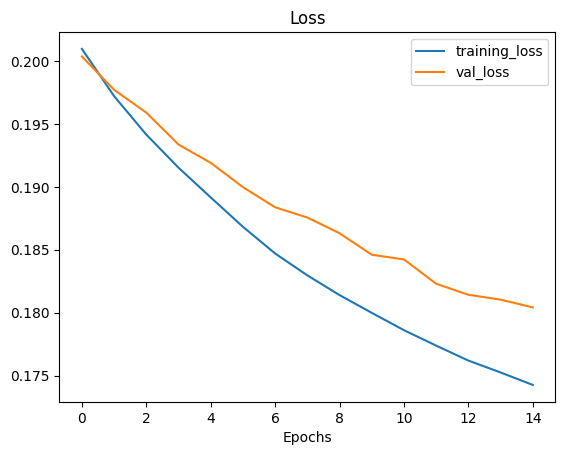

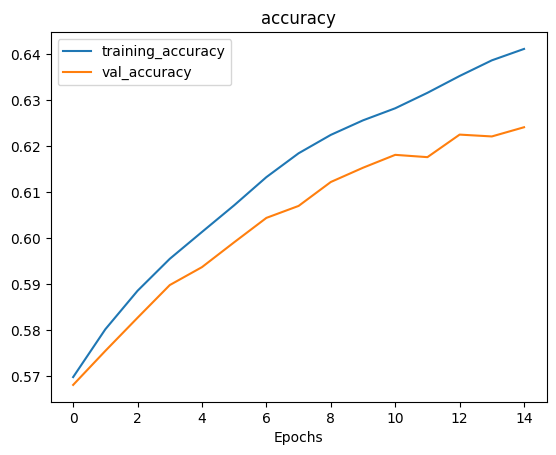

In [33]:
# plot history_1_2
plot_loss_curves(history_1_2)

It seems like our model started to overfitted so things we can do
1. Use Data augmentation
2. use regularizaion techniques like dropout

In [41]:
# Saving model 1
import os
save_dir = "drive/MyDrive/ComputerVision/CIFAR10/Model_1"
os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model_1.save(save_dir)

In [42]:
# reloding our model and testing
load_saved_model = tf.keras.models.load_model(save_dir)
load_saved_model.evaluate(test_data_pipe)

313/313 [==============================] - 2s 5ms/step - loss: 0.1804 - accuracy: 0.6241


[0.18042129278182983, 0.6241000294685364]

### Using Data Augmentation
We will create model_2 that has a built in data augmentation layer

Our augmentation layer will make the following changes:
1. flips
2. rotations
3. zooms
4. change height
5. change width

In [72]:
# Creating data augmentation layer
from tensorflow.keras import layers

data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.Resizing(height=32, width=32, interpolation='bilinear')
], name = 'data_augmentation')

In [73]:
# Creating model 2 with data augmentaion "using the funcional api"
from tensorflow.keras.layers import GlobalAveragePooling2D
inputs = layers.Input(shape = (32, 32 , 3) , name = 'input_layer')

x = data_augmentation(inputs)

x = Conv2D(10 , 3 , activation = 'relu')(x)
x = Conv2D(10 , 3 , activation = 'relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(10 , 3 , activation = 'relu')(x)
x = Conv2D(10 , 3 , activation = 'relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)

outputs = Dense(10 , activation = 'softmax')(x)
model_2 = tf.keras.Model(inputs , outputs)

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [74]:
model_2.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 data_augmentation (Sequenti  (None, 32, 32, 3)        0         
 al)                                                             
                                                                 
 conv2d_89 (Conv2D)          (None, 30, 30, 10)        280       
                                                                 
 conv2d_90 (Conv2D)          (None, 28, 28, 10)        910       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 14, 14, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 12, 12, 10)        910

🔑Note: flatten layers do not work with variable length and the data augmentation layer produce variable length so we used the layers.resizing to fix the length
check: https://stackoverflow.com/questions/56918388/error-valueerror-the-last-dimension-of-the-inputs-to-dense-should-be-defined

In [75]:
# Training for an extra 15 epochs to compare with model 0
history_2 = model_2.fit(train_data_pipe,
                        epochs = 20,
                        steps_per_epoch = len(train_data_pipe),
                        validation_data = test_data_pipe,
                        validation_steps = len(test_data_pipe))

Epoch 1/20
1563/1563 [==============================] - 17s 9ms/step - loss: 1.8817 - accuracy: 0.3149 - val_loss: 1.9700 - val_accuracy: 0.3250
Epoch 2/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.7265 - accuracy: 0.3783 - val_loss: 1.9452 - val_accuracy: 0.3455
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6706 - accuracy: 0.3996 - val_loss: 1.8867 - val_accuracy: 0.3735
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6395 - accuracy: 0.4143 - val_loss: 1.7383 - val_accuracy: 0.4042
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6166 - accuracy: 0.4187 - val_loss: 1.8573 - val_accuracy: 0.3806
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5940 - accuracy: 0.4281 - val_loss: 1.7896 - val_accuracy: 0.4047
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5852 - accuracy: 0.4323 - val_loss: 1.7355 - val_a

In [76]:
model_2.evaluate(test_data_pipe)

313/313 [==============================] - 2s 5ms/step - loss: 1.6850 - accuracy: 0.4336


[1.6850017309188843, 0.4336000084877014]

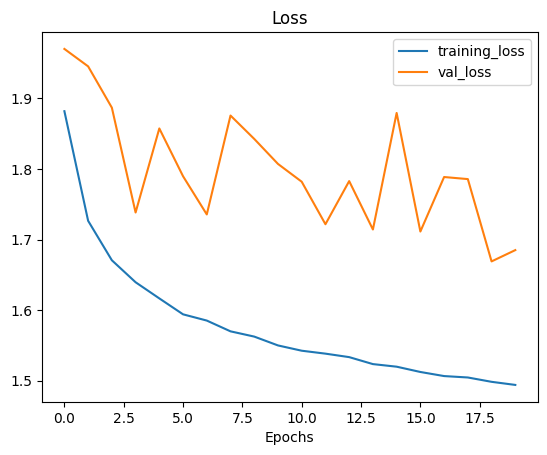

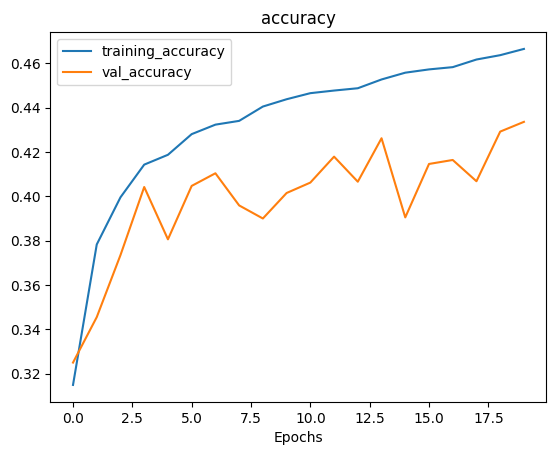

In [77]:
plot_loss_curves(history_2)

It seems like the model performance decrease and some overfitting is also happening

What to do next?
1. Increase the complexity of a model
2. Add dropout regularization

In [84]:
# Saving model 2
import os
save_dir = "drive/MyDrive/ComputerVision/CIFAR10/Model_2"
os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model_2.save(save_dir)
# reloding our model and testing
load_saved_model = tf.keras.models.load_model(save_dir)
load_saved_model.evaluate(test_data_pipe)

313/313 [==============================] - 1s 4ms/step - loss: 1.6850 - accuracy: 0.4336


[1.6850017309188843, 0.4336000084877014]

### Data Augmentation + Bigger Model

In [81]:
# Creating model 3 with data augmentaion "using the funcional api"
from tensorflow.keras.layers import GlobalAveragePooling2D
inputs = layers.Input(shape = (32, 32 , 3) , name = 'input_layer')

x = data_augmentation(inputs)

x = Conv2D(32 , 3 , padding = 'same' , activation = 'relu')(x)
x = Conv2D(32 , 3 , activation = 'relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(64 , 3 , padding = 'same' , activation = 'relu')(x)
x = Conv2D(64 , 3 , activation = 'relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)

outputs = Dense(10 , activation = 'softmax')(x)
model_3 = tf.keras.Model(inputs , outputs)

model_3.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [82]:
model_3.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 data_augmentation (Sequenti  (None, 32, 32, 3)        0         
 al)                                                             
                                                                 
 conv2d_97 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_98 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 15, 15, 64)        184

In [83]:
# Training for an extra 15 epochs to compare with model 0
history_3 = model_3.fit(train_data_pipe,
                        epochs = 20,
                        steps_per_epoch = len(train_data_pipe),
                        validation_data = test_data_pipe,
                        validation_steps = len(test_data_pipe))

Epoch 1/20
1563/1563 [==============================] - 20s 10ms/step - loss: 1.7542 - accuracy: 0.3667 - val_loss: 1.6265 - val_accuracy: 0.4151
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5435 - accuracy: 0.4483 - val_loss: 1.5057 - val_accuracy: 0.4658
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4526 - accuracy: 0.4823 - val_loss: 1.4142 - val_accuracy: 0.5021
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3803 - accuracy: 0.5095 - val_loss: 1.4439 - val_accuracy: 0.5047
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3335 - accuracy: 0.5294 - val_loss: 1.4971 - val_accuracy: 0.4984
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2815 - accuracy: 0.5509 - val_loss: 1.5191 - val_accuracy: 0.4942
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2451 - accuracy: 0.5580 - val_loss: 1.2871 -

In [85]:
model_3.evaluate(test_data_pipe)

313/313 [==============================] - 2s 5ms/step - loss: 1.2827 - accuracy: 0.5882


[1.2826921939849854, 0.5881999731063843]

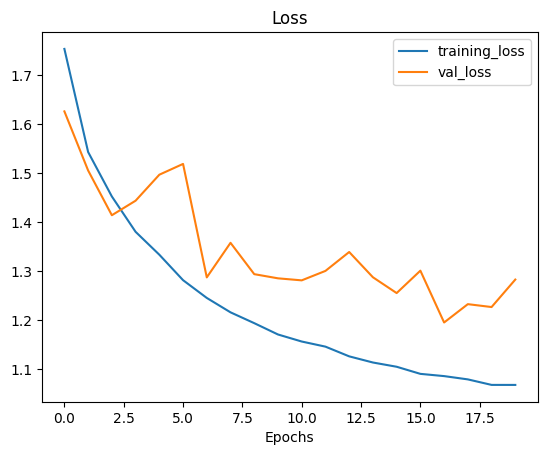

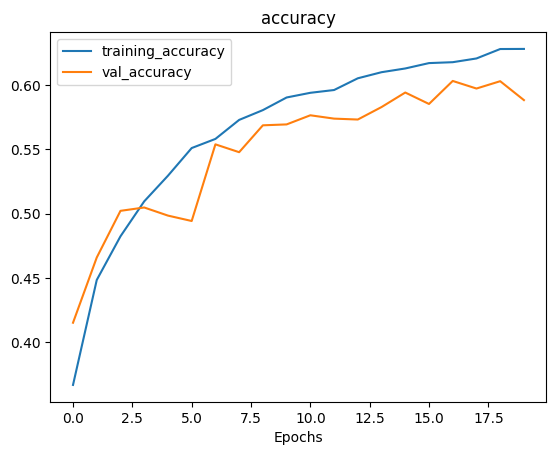

In [87]:
plot_loss_curves(history_3)

It seems our model is heading towards the right direction "a bit noisy" , but has a approx. equal performance to model 1 with less chance of overfitting. We could train it for a couple more epochs and see what happens

In [88]:
# Training for an extra 15 epochs to compare with model 0
history_3_2 = model_3.fit(train_data_pipe,
                          epochs = 20,
                          steps_per_epoch = len(train_data_pipe),
                          validation_data = test_data_pipe,
                          validation_steps = len(test_data_pipe))

Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0605 - accuracy: 0.6278 - val_loss: 1.1686 - val_accuracy: 0.6156
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0527 - accuracy: 0.6320 - val_loss: 1.3623 - val_accuracy: 0.5802
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0556 - accuracy: 0.6298 - val_loss: 1.3853 - val_accuracy: 0.5762
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0397 - accuracy: 0.6367 - val_loss: 1.1789 - val_accuracy: 0.6140
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0295 - accuracy: 0.6401 - val_loss: 1.2619 - val_accuracy: 0.5975
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0301 - accuracy: 0.6385 - val_loss: 1.2443 - val_accuracy: 0.5969
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0238 - accuracy: 0.6423 - val_loss: 1.2481 -

In [89]:
model_3.evaluate(test_data_pipe)

313/313 [==============================] - 1s 4ms/step - loss: 1.2495 - accuracy: 0.6101


[1.249481439590454, 0.6100999712944031]

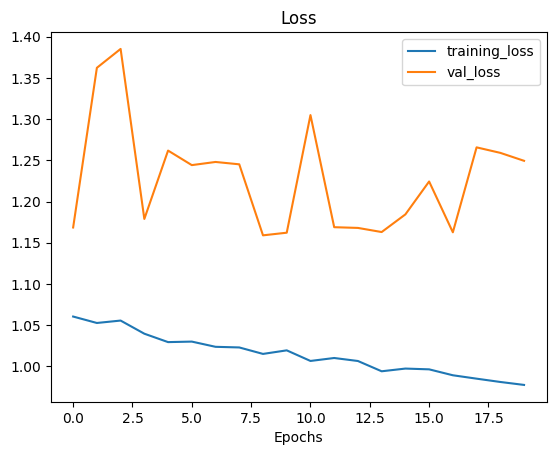

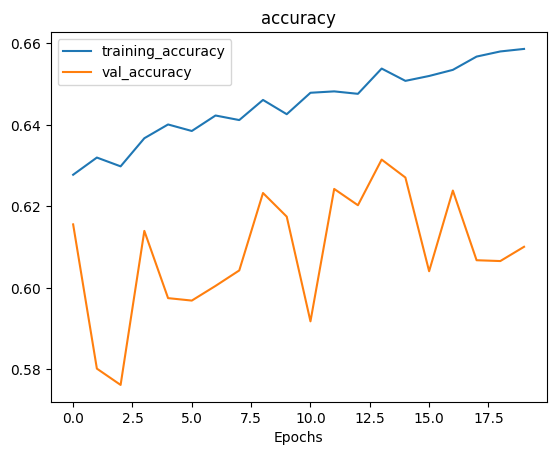

In [90]:
plot_loss_curves(history_3_2)

It seems like our model started to overfit so let's add some dropout to our architecture

### Model_4: Adding Dropout to model_3

In [92]:
# Creating model 3 with data augmentaion "using the funcional api"
from tensorflow.keras.layers import Dropout
inputs = layers.Input(shape = (32, 32 , 3) , name = 'input_layer')

x = data_augmentation(inputs)

x = Conv2D(32 , 3 , padding = 'same' , activation = 'relu')(x)
x = Conv2D(32 , 3 , activation = 'relu')(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.25)(x)

x = Conv2D(64 , 3 , padding = 'same' , activation = 'relu')(x)
x = Conv2D(64 , 3 , activation = 'relu')(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
outputs = Dense(10 , activation = 'softmax')(x)
model_4 = tf.keras.Model(inputs , outputs)

model_4.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [93]:
# Training for an extra 15 epochs to compare with model 0
history_4 = model_4.fit(train_data_pipe,
                        epochs = 40,
                        steps_per_epoch = len(train_data_pipe),
                        validation_data = test_data_pipe,
                        validation_steps = len(test_data_pipe))

Epoch 1/40
1563/1563 [==============================] - 26s 13ms/step - loss: 1.8302 - accuracy: 0.3321 - val_loss: 1.7567 - val_accuracy: 0.3713
Epoch 2/40
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6110 - accuracy: 0.4178 - val_loss: 1.6291 - val_accuracy: 0.4127
Epoch 3/40
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5373 - accuracy: 0.4463 - val_loss: 1.4803 - val_accuracy: 0.4730
Epoch 4/40
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4832 - accuracy: 0.4667 - val_loss: 1.4422 - val_accuracy: 0.4862
Epoch 5/40
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4445 - accuracy: 0.4844 - val_loss: 1.4191 - val_accuracy: 0.5041
Epoch 6/40
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4089 - accuracy: 0.4985 - val_loss: 1.4450 - val_accuracy: 0.5025
Epoch 7/40
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3717 - accuracy: 0.5127 - val_loss: 1.4265 -

In [95]:
model_4.evaluate(test_data_pipe)

313/313 [==============================] - 1s 4ms/step - loss: 1.2672 - accuracy: 0.5769


[1.267242431640625, 0.5769000053405762]

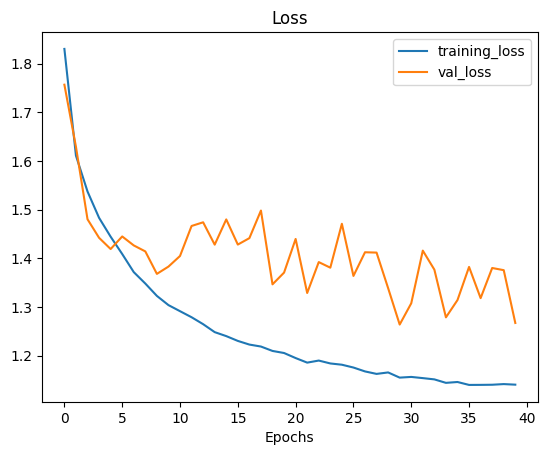

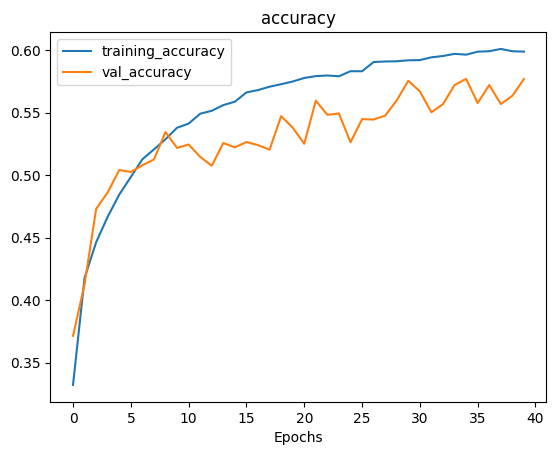

In [96]:
plot_loss_curves(history_4)

In [94]:
# Saving model 2
import os
save_dir = "drive/MyDrive/ComputerVision/CIFAR10/Model_4"
os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model_4.save(save_dir)
# reloding our model and testing
load_saved_model = tf.keras.models.load_model(save_dir)
load_saved_model.evaluate(test_data_pipe)

313/313 [==============================] - 1s 4ms/step - loss: 1.2672 - accuracy: 0.5769


[1.267242431640625, 0.5769000053405762]

After a lot of experiments and enhancing our tiny VGG architecture it seems like the max we can reach is ~62% accuracy

Things we can try:
1. Change learning rates and optimizer
2. Adding batch normalization
3. Change model Architecture

## More Complex Architecture
In this architecture we will have:
1. convolutional layers
2. pooling layers
3. dense layers
4. Batchnormalization
5. dropout
6. dense layers
7. earlystopping callback
8. reduce learning rate on plateau callback
9. Data Augmentation layer


In [103]:
# Creating model 3 with data augmentaion "using the funcional api"
from tensorflow.keras.layers import Dropout , BatchNormalization
inputs = layers.Input(shape = (32, 32 , 3) , name = 'input_layer')

x = data_augmentation(inputs)

x = Conv2D(64 , 5 , padding = 'same' , activation = 'relu')(x)
x = Conv2D(128 , 3 , padding = 'same' , activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2 , strides = 2)(x)
x = Dropout(0.2)(x)

x = Conv2D(128 , 3 , padding = 'same' , activation = 'relu')(x)
x = Conv2D(128 , 3 , padding = 'same' , activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.2)(x)

x = Conv2D(128 , 3 , padding = 'same' , activation = 'relu')(x)
x = Conv2D(128 , 3 , padding = 'same' , activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(256 , activation = 'relu')(x)
outputs = Dense(10 , activation = 'softmax')(x)
model_5 = tf.keras.Model(inputs , outputs)

model_5.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [104]:
model_5.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 data_augmentation (Sequenti  (None, 32, 32, 3)        0         
 al)                                                             
                                                                 
 conv2d_123 (Conv2D)         (None, 32, 32, 64)        4864      
                                                                 
 conv2d_124 (Conv2D)         (None, 32, 32, 128)       73856     
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 16, 16, 128)      0  

about a million parameters , that is a huge increase from previous models

In [105]:
# Creating our callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy' , patience = 10)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor=0.5,
                                                 patience=5,
                                                 verbose=1,
                                                 mode='max',
                                                 min_lr=0.00001)

In [106]:
# Training model
history_5 = model_5.fit(train_data_pipe,
                        epochs = 40,
                        steps_per_epoch = len(train_data_pipe),
                        validation_data = test_data_pipe,
                        validation_steps = len(test_data_pipe),
                        callbacks = [early_stopping , reduce_lr])

Epoch 1/40
1563/1563 [==============================] - 41s 23ms/step - loss: 1.7996 - accuracy: 0.3577 - val_loss: 1.6617 - val_accuracy: 0.4163 - lr: 0.0010
Epoch 2/40
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5307 - accuracy: 0.4456 - val_loss: 1.5341 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 3/40
1563/1563 [==============================] - 29s 19ms/step - loss: 1.3869 - accuracy: 0.5055 - val_loss: 1.4010 - val_accuracy: 0.5050 - lr: 0.0010
Epoch 4/40
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2759 - accuracy: 0.5472 - val_loss: 1.3178 - val_accuracy: 0.5311 - lr: 0.0010
Epoch 5/40
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1964 - accuracy: 0.5754 - val_loss: 1.2156 - val_accuracy: 0.5837 - lr: 0.0010
Epoch 6/40
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1380 - accuracy: 0.5986 - val_loss: 1.2524 - val_accuracy: 0.5782 - lr: 0.0010
Epoch 7/40
1563/1563 [========================

In [109]:
# Evaluating our model
model_5.evaluate(test_data_pipe)

313/313 [==============================] - 2s 5ms/step - loss: 0.8404 - accuracy: 0.7385


[0.8403673768043518, 0.7384999990463257]

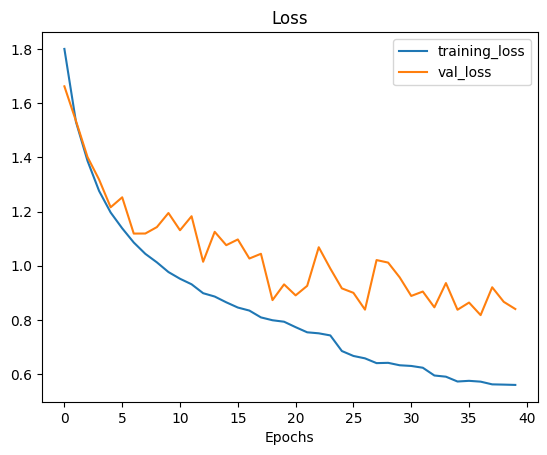

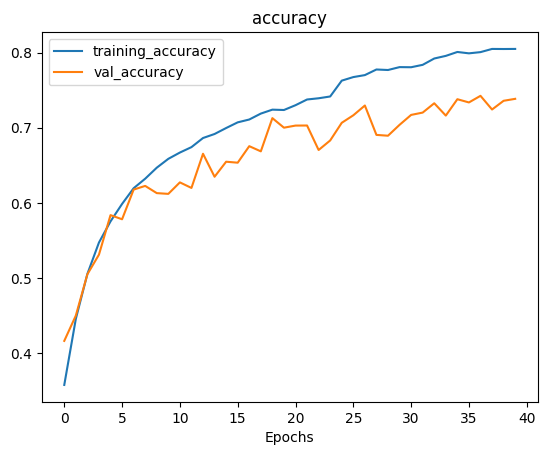

In [107]:
# Plotting loss curves
plot_loss_curves(history_5)

In [108]:
# Saving our model
# Saving model 2
import os
save_dir = "drive/MyDrive/ComputerVision/CIFAR10/Model_5"
os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model_5.save(save_dir)
# reloding our model and testing
load_saved_model = tf.keras.models.load_model(save_dir)
load_saved_model.evaluate(test_data_pipe)

313/313 [==============================] - 2s 6ms/step - loss: 0.8404 - accuracy: 0.7385


[0.8403673768043518, 0.7384999990463257]

It seems is model is overfitting but there is a chance of improvement as the general trend is going upwards

In [111]:
# create a model checkpoint
model_checkpoint_callback = create_model_checkpoint('model_5_2')
# Training model for another 160 epochs trying to reach 80% Validation accuracy
history_5 = model_5.fit(train_data_pipe,
                        epochs = 160,
                        steps_per_epoch = len(train_data_pipe),
                        validation_data = test_data_pipe,
                        validation_steps = len(test_data_pipe),
                        callbacks = [early_stopping , reduce_lr , model_checkpoint_callback])

Epoch 1/160
1563/1563 [==============================] - 31s 20ms/step - loss: 0.5532 - accuracy: 0.8062 - val_loss: 0.8405 - val_accuracy: 0.7396 - lr: 2.5000e-04
Epoch 2/160
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5503 - accuracy: 0.8093 - val_loss: 0.9266 - val_accuracy: 0.7182 - lr: 2.5000e-04
Epoch 3/160
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5499 - accuracy: 0.8090 - val_loss: 0.8636 - val_accuracy: 0.7359 - lr: 2.5000e-04
Epoch 4/160
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5460 - accuracy: 0.8086 - val_loss: 0.8211 - val_accuracy: 0.7463 - lr: 2.5000e-04
Epoch 5/160
1563/1563 [==============================] - 28s 18ms/step - loss: 0.5423 - accuracy: 0.8114 - val_loss: 0.8689 - val_accuracy: 0.7338 - lr: 2.5000e-04
Epoch 6/160
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5368 - accuracy: 0.8129 - val_loss: 0.8200 - val_accuracy: 0.7451 - lr: 2.5000e-04
Epoch 7/160
1563

It seems like the model plateued and early stopping callback stopped the training process after 40 epochs in the first training and 55 epochs in the seccond one

In [112]:
# Loading best weights from checkpoint
model_5.load_weights('model_5_2/cp.cpkt')
model_5.evaluate(test_data_pipe)

313/313 [==============================] - 3s 9ms/step - loss: 0.7774 - accuracy: 0.7611


[0.7773957252502441, 0.7610999941825867]

So model_5 gained about 14% increase validation accuracy from previous models

In [113]:
import os
save_dir = "drive/MyDrive/ComputerVision/CIFAR10/Model_5_best"
os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model_5.save(save_dir)
# reloding our model and testing
load_saved_model = tf.keras.models.load_model(save_dir)
load_saved_model.evaluate(test_data_pipe)

313/313 [==============================] - 3s 8ms/step - loss: 0.7774 - accuracy: 0.7611


[0.7773957252502441, 0.7610999941825867]

What we can do next?
* Try more complex architectures
* Try to get more data
* Try transfer learning as according to papers with code there are a several models that can score ~99% accuracy on cifar10